In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

In [2]:
random.seed(2022)
mu = 2.5 # Mean
sigma = 2 # Volatility
K = 6 # Strike Price
n = 5000 # Sample Size
m = 1000 # Number of Simulations

In [3]:
def BachelierCall(sample, simulations):
    # Question 4: Histogram
    v = np.zeros((sample, simulations))
    for i in range(0, simulations):
        for j in range(0, sample):
            v[j][i] = max(mu + sigma*np.random.normal(0,1) - K, 0)
    v_mean = np.mean(v, axis = 0)
    plt.figure(figsize=(10, 6))
    plt.title('Histogram of Bachelier Option Value')
    plt.xlabel('Option Value')
    plt.ylabel('Frequency')
    plt.hist(v_mean)
    plt.show()
    
    # Question 4: Finding the exact value
    exact_value = sigma*norm.pdf((K-mu)/sigma) - (K-mu)*(1-norm.cdf((K-mu)/sigma))
    print('The exact value is {:.5f}'.format(exact_value))

    return v_mean

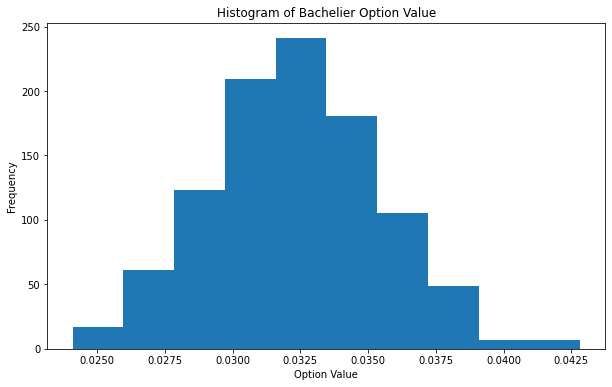

The exact value is 0.03235


In [4]:
v_mean = BachelierCall(n,m)

In [5]:
# Question 5: Finding Variance
def BachelierCall_Variance():
    sum_j = []
    for i in range(0, m):
        M = m
        v_j = (v_mean[i] - (np.sum(v_mean)/M))**2
        sum_j.append(v_j)
    sum_j = np.sum(sum_j)/(M-1)
    print('The variance is {:.10f}'.format(sum_j))

In [6]:
BachelierCall_Variance()

The variance is 0.0000098284


In [7]:
# Question 6
def ImportanceSample(A, space_A, sample_size, K, mu, sigma):
    
    value_mean = []
    
    for a in np.linspace(0, A, space_A):
        x = np.random.normal(0, 1, sample_size)
        value_ga = []
        for i in range(0, sample_size):
            dPdQ = np.exp(0.5*(a**2))/np.exp(a*x[i])
            payoff = (max(mu + sigma*x[i] - K, 0)**2)
            v = dPdQ*payoff
            
            value_ga.append(v)
        value_mean.append(np.mean(value_ga))
    ga_min = min(value_mean)
    a_min = value_mean.index(ga_min)
    
    plt.figure(figsize=(10, 6))
    plt.plot(value_mean)
    plt.plot(a_min, ga_min, marker = 'o')
    plt.annotate(f'minimum g(a) = {ga_min:.5f} at {a_min/200:.3f}', xy=(a_min, ga_min), xytext =(a_min, 0.02), arrowprops = dict(facecolor ='green', shrink = 0.05),)
    plt.xticks([0, 200, 400, 600, 800, 1000], [0, 1, 2, 3, 4, 5])
    plt.title(r'g(a), a$\in[0,5]$')
    plt.ylabel('g(a)')
    plt.xlabel('a')
    plt.show()
    
    return a_min/200

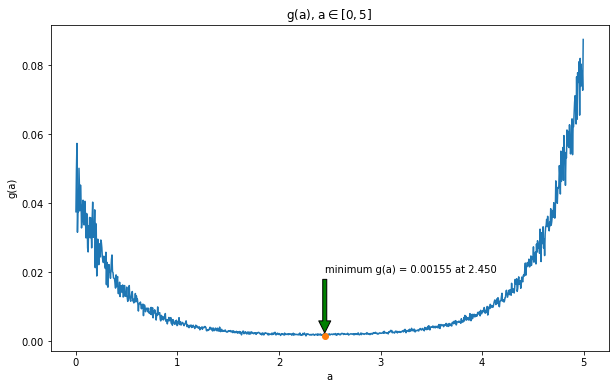

In [8]:
# a_min is the miminum of the function g
a_min = ImportanceSample(5, 1000, n, K, mu, sigma)

In [9]:
# Question 7
def ImportanceSampleOptionValue(sample_size, simulations, a_min, K, mu, sigma):     
        
    x = np.random.normal(a_min, 1, (sample_size, simulations))    
    v = np.zeros((sample_size, simulations))
    for i in range(0, simulations):
        for j in range(0, sample_size):
            dPdQ = np.exp(0.5 * a_min**2) / np.exp(a_min * x[j][i])
            payoff = max(mu + sigma*x[j][i] - K, 0)
            v[j][i] = dPdQ*payoff
    v_mean = np.mean(v, axis = 0)   
        
        
    plt.figure(figsize=(10, 6))
    plt.title('Importance Sample - Option Value')
    plt.xlabel('Option Value')
    plt.ylabel('Frequency')
    plt.hist(v_mean)
    plt.show()
    
    exact_value = sigma*norm.pdf((K-mu)/sigma) - (K-mu)*(1-norm.cdf((K-mu)/sigma))
    print('The exact value is {:.5f}'.format(exact_value))
    
    return v_mean

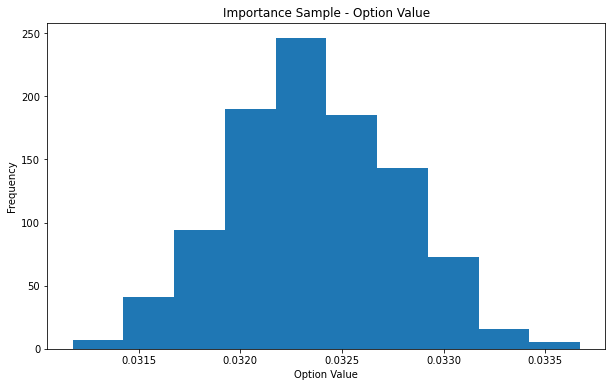

The exact value is 0.03235


In [10]:
v_mean = ImportanceSampleOptionValue(n, m, a_min, K, mu, sigma)

In [11]:
def ImportanceSampleVariance():
    sum_j = []
    for i in range(0, m):
        M = m
        v_j = (v_mean[i] - (np.sum(v_mean)/M))**2
        sum_j.append(v_j)
    sum_j = np.sum(sum_j)/(M-1)
    print('The variance for importance sample is {:.10f}'.format(sum_j))

In [12]:
ImportanceSampleVariance()

The variance for importance sample is 0.0000001687
